In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot(*args):
    count = len(args)
    fig, ax = plt.subplots(1,count)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    if count==1:
        ax.imshow(args[0], cmap="gray")
    else:
        for i in range(len(ax)):
            ax[i].imshow(args[i], cmap="gray")
    plt.show()

ModuleNotFoundError: No module named 'cv2'

In [3]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC + cv2.fisheye.CALIB_FIX_SKEW
# inner size of chessboard
width = 9
height = 6
square_size = 0.025 # 0.025 meters

In [4]:
objp = np . zeros (( height * width , 1, 3) , np.float64 )
objp [: , 0, :2] = np . mgrid [0: width , 0: height ]. T. reshape ( -1 , 2)
objp = objp * square_size # Create real world coords . Use your metric .
# Arrays to store object points and image points from all the images .
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane .
img_width = 640
img_height = 480
image_size = (img_width, img_height)
path = ""
image_dir = "./pairs/"
number_of_images = 50
for i in range (1 , number_of_images ):
    # read image
    img = cv2.imread( image_dir + "left_%02d.png" % i)
    gray = cv2.cvtColor ( img , cv2 . COLOR_BGR2GRAY )
    # Find the chess board corners
    ret , corners = cv2 . findChessboardCorners ( gray , ( width , height ) , cv2 .
    CALIB_CB_ADAPTIVE_THRESH + cv2 . CALIB_CB_FAST_CHECK + cv2 .
    CALIB_CB_NORMALIZE_IMAGE )
    Y , X , channels = img . shape
    # skip images where the corners of the chessboard are too close to the edges of the image
    if ( ret == True ) :
        minRx = corners [: ,: ,0]. min ()
        maxRx = corners [: ,: ,0]. max ()
        minRy = corners [: ,: ,1]. min ()
        maxRy = corners [: ,: ,1]. max ()
        border_threshold_x = X /12
        border_threshold_y = Y /12
        x_thresh_bad = False
        if ( minRx < border_threshold_x ):
            x_thresh_bad = True
        y_thresh_bad = False
        if ( minRy < border_threshold_y ):
            y_thresh_bad = True
        if ( y_thresh_bad == True ) or ( x_thresh_bad == True ):
            continue
    
    # If found , add object points , image points ( after refining them )
    if ret == True :
        objpoints . append ( objp )
        # improving the location of points (sub - pixel )
        corners2 = cv2 . cornerSubPix ( gray , corners , (3 , 3) , ( -1 , -1) , criteria )
        imgpoints . append ( corners2 )
        # Draw and display the corners
        # Show the image to see if pattern is found ! imshow function .
        cv2 . drawChessboardCorners ( img , ( width , height ) , corners2 , ret )
        cv2 . imshow (" Corners ", img )
        cv2 . waitKey (5)
    else :
        print (" Chessboard couldn ’t detected . Image pair : ", i)
        continue

 Chessboard couldn ’t detected . Image pair :  30


In [5]:
image = cv2.imread( image_dir + "left_01.png")

In [9]:
### ZAD 2 - KALIBRACJA :)

In [7]:
N_OK = len ( objpoints )
K = np . zeros ((3 , 3) )
D = np . zeros ((4 , 1) )
rvecs = [ np . zeros ((1 , 1 , 3) , dtype = np . float64 ) for i in range ( N_OK )]
tvecs = [ np . zeros ((1 , 1 , 3) , dtype = np . float64 ) for i in range ( N_OK )]
ret , K , D , _ , _ = cv2.fisheye.calibrate(objpoints, imgpoints, image_size, K, D, rvecs, tvecs, 
                      calibration_flags, (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 1e-6))
# Let ’s rectify our results
map1 , map2 = cv2 . fisheye . initUndistortRectifyMap (K , D , np . eye (3) , K , image_size , cv2 . CV_16SC2 )


In [8]:
image = cv2.imread(image_dir+"left_01.png")
undistorted_image = cv2.remap(image, map1, map2, interpolation=cv2.INTER_LINEAR ,borderMode=cv2.BORDER_CONSTANT)

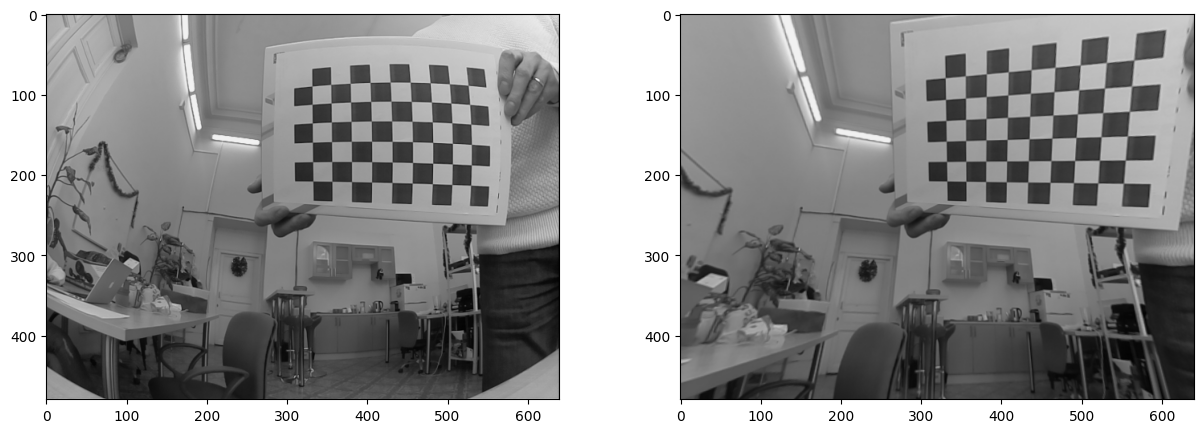

In [9]:
plot(image, undistorted_image)

In [12]:
### DWIE KAMERY

In [10]:
criteria = ( cv2 . TERM_CRITERIA_EPS + cv2 . TERM_CRITERIA_MAX_ITER , 30 , 0.001)
calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC + cv2.fisheye.CALIB_FIX_SKEW
# inner size of chessboard
width = 9
height = 6
square_size = 0.025 # 0.025 meters

# prepare object points , like (0 ,0 ,0) , (1 ,0 ,0) , (2 ,0 ,0) .... ,(8 ,6 ,0)
objp = np . zeros (( height * width , 1, 3) , np . float64 )
objp [: , 0, :2] = np . mgrid [0: width , 0: height ]. T. reshape ( -1 , 2)
objp = objp * square_size # Create real world coords . Use your metric .
# Arrays to store object points and image points from all the images .
objpoints = [] # 3d point in real world space
imgpoints = []
imgpoints_left = []
imgpoints_right = []
img_width = 640
img_height = 480
image_size = ( img_width , img_height )

image_dir = "./pairs/"
number_of_images = 8
for i in range (1 , number_of_images ):
# read image
    img_left = cv2 . imread ( image_dir + "left_%02d.png" % i)
    gray_left = cv2 . cvtColor ( img_left , cv2 . COLOR_BGR2GRAY )
    # Find the chess board corners
    ret_left, corners_left = cv2.findChessboardCorners(gray_left, (width, height), cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE )

    img_right = cv2 . imread ( image_dir + "right_%02d.png" % i)
    gray_right = cv2 . cvtColor ( img_right , cv2 . COLOR_BGR2GRAY )
    ret_right, corners_right = cv2.findChessboardCorners(gray_right, (width, height), cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE )
    X, Y, channels = img_left.shape
    # skip images where the corners of the chessboard are too close to the edges of the image
    if ( ret_left == True and ret_right == True ) :
        minRx = corners_left[: ,: ,0]. min ()
        maxRx = corners_left[: ,: ,0]. max ()
        minRy = corners_left[: ,: ,1]. min ()
        maxRy = corners_left[: ,: ,1]. max ()
        
        border_threshold_x = X /12
        border_threshold_y = Y /12
        
        x_thresh_bad = False
        if ( minRx < border_threshold_x ):
            x_thresh_bad = True
        y_thresh_bad = False
        if ( minRy < border_threshold_y ):
            y_thresh_bad = True
        if ( y_thresh_bad == True ) or ( x_thresh_bad == True ):
            continue
    # If found , add object points , image points ( after refining them )
    if ret_left == True and ret_right == True :
        objpoints . append ( objp )
        # improving the location of points (sub - pixel )
        corners_left = cv2 . cornerSubPix ( gray_left , corners_left , (3 , 3) , ( -1 , -1) , criteria )
        corners_right = cv2 . cornerSubPix ( gray_right , corners_right , (3 , 3) , ( -1 , -1) , criteria )
        imgpoints_left . append ( corners_left )
        imgpoints_right . append ( corners_right )
        # Draw and display the corners
        # Show the image to see if pattern is found ! imshow function .
        # cv2 . drawChessboardCorners ( img , ( width , height ) , corners2 , ret )
        # cv2 . imshow (" Corners ", img )
        # cv2 . waitKey (5)
    else :
        print (" Chessboard couldn ’t detected . Image pair : ", i)
        continue


In [11]:
N_OK_left = len ( objpoints )
K_left = np . zeros ((3 , 3) )
D_left = np . zeros ((4 , 1) )
rvecs_left = [ np . zeros ((1 , 1 , 3) , dtype = np . float64 ) for i in range ( N_OK_left )]
tvecs_left = [ np . zeros ((1 , 1 , 3) , dtype = np . float64 ) for i in range ( N_OK_left )]
ret_left , K_left , D_left , _ , _ = \
    cv2 . fisheye . calibrate (
        objpoints ,
        imgpoints_left ,
        image_size ,
        K_left ,
        D_left ,
        rvecs_left ,
        tvecs_left ,
        calibration_flags ,(cv2 . TERM_CRITERIA_EPS + cv2 . TERM_CRITERIA_MAX_ITER , 30 , 1e-6))
# Let ’s rectify our results
map1_left , map2_left = cv2 . fisheye . initUndistortRectifyMap (K_left , D_left , np . eye (3) , K_left , image_size ,cv2 . CV_16SC2 )



N_OK_right = len ( objpoints )
K_right = np . zeros ((3 , 3) )
D_right = np . zeros ((4 , 1) )
rvecs_right = [ np . zeros ((1 , 1 , 3) , dtype = np . float64 ) for i in range ( N_OK_right )]
tvecs_right = [ np . zeros ((1 , 1 , 3) , dtype = np . float64 ) for i in range ( N_OK_right )]
ret_right , K_right , D_right , _ , _ = \
    cv2 . fisheye . calibrate (
        objpoints ,
        imgpoints_right ,
        image_size ,
        K_right ,
        D_right ,
        rvecs_right ,
        tvecs_right ,
        calibration_flags ,(cv2 . TERM_CRITERIA_EPS + cv2 . TERM_CRITERIA_MAX_ITER , 30 , 1e-6))
# Let ’s rectify our results
map1_right , map2_right = cv2 . fisheye . initUndistortRectifyMap (K_right , D_right , np . eye (3) , K_right , image_size , cv2.CV_16SC2 )

In [12]:
imgpointsLeft = imgpoints_left
imgpointsRight = imgpoints_right

imgpointsLeft = np . asarray ( imgpointsLeft , dtype = np . float64 )
imgpointsRight = np . asarray ( imgpointsRight , dtype = np . float64 )
( RMS , _ , _ , _ , _ , rotationMatrix , translationVector ) = \
    cv2 . fisheye . stereoCalibrate (objpoints , imgpointsLeft , imgpointsRight ,K_left , D_left ,K_right , D_right ,image_size , None , None ,
    cv2 . CALIB_FIX_INTRINSIC ,( cv2 . TERM_CRITERIA_EPS + cv2 . TERM_CRITERIA_MAX_ITER , 30 , 0.01) )

R2 = np . zeros ([3 ,3])
P1 = np . zeros ([3 ,4])
P2 = np . zeros ([3 ,4])
Q = np . zeros ([4 ,4])
# Rectify calibration results
( leftRectification , rightRectification , leftProjection , rightProjection ,dispartityToDepthMap ) = \
        cv2 . fisheye . stereoRectify (K_left , D_left ,K_right , D_right ,image_size , rotationMatrix , translationVector ,0, R2 , P1 , P2 , Q ,
        cv2 . CALIB_ZERO_DISPARITY , (0 ,0) , 0 , 0)

map1_left , map2_left = cv2 . fisheye . initUndistortRectifyMap (K_left , D_left , leftRectification ,leftProjection , image_size , cv2 . CV_16SC2 )

map1_right , map2_right = cv2.fisheye.initUndistortRectifyMap (K_right , D_right , rightRectification ,rightProjection , image_size , cv2 . CV_16SC2 )


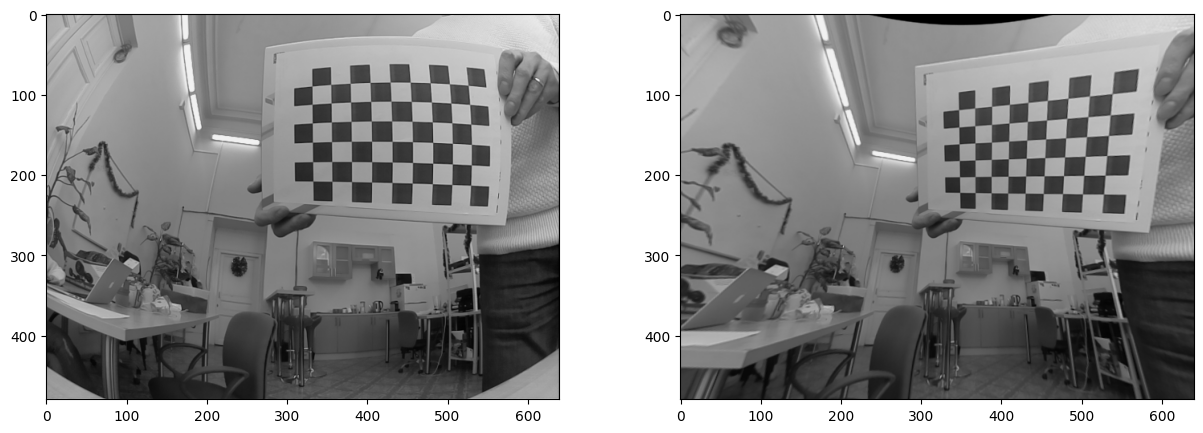

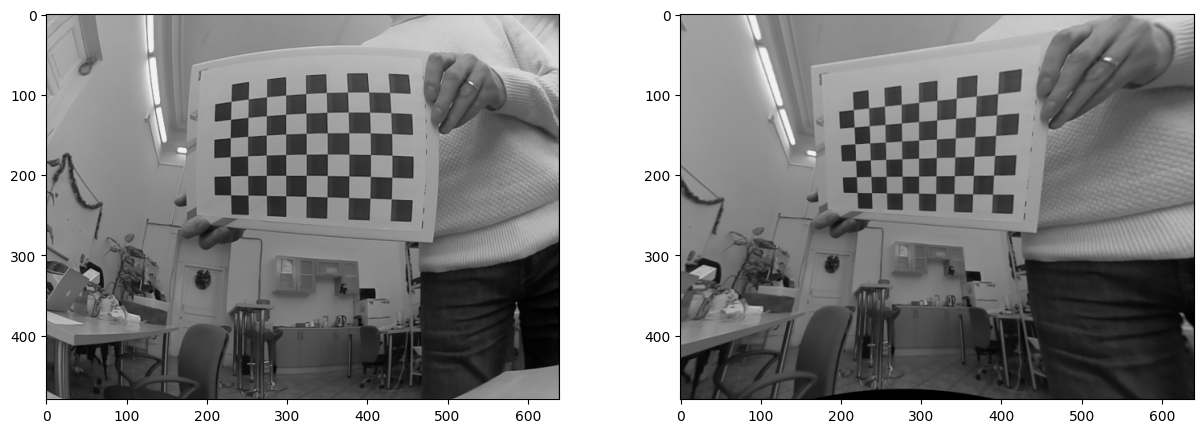

In [13]:
img_left = cv2.imread("./pairs/left_01.png")
img_right = cv2.imread("./pairs/right_01.png")

dst_L = cv2 . remap ( img_left , map1_left , map2_left , cv2 . INTER_LINEAR )
dst_R = cv2 . remap ( img_right , map1_right , map2_right , cv2 . INTER_LINEAR )

plot(img_left, dst_L)
plot(img_right, dst_R)

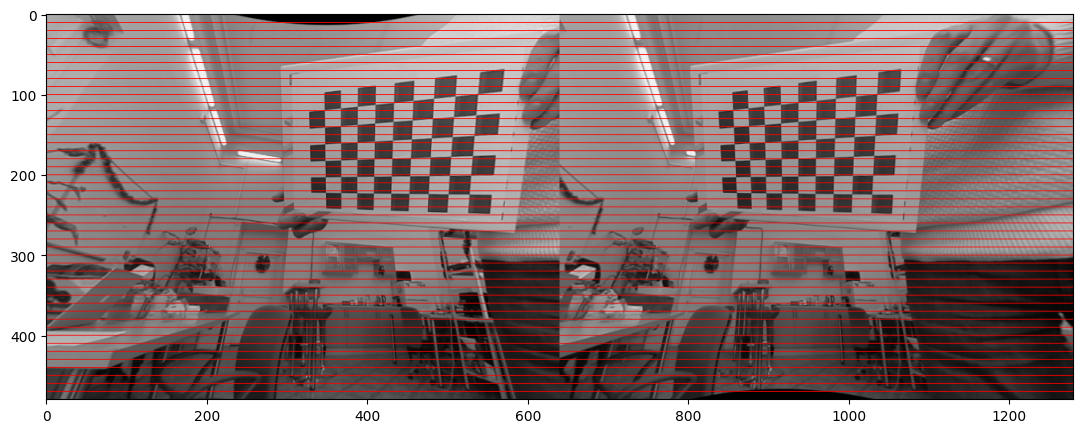

In [14]:
N , XX , YY = dst_L . shape [:: -1] # RGB image size
visRectify = np . zeros (( YY , XX *2 , N) , np . uint8 ) # create a new image with a new size
( height , 2* width )
visRectify [: ,0: XX : ,:] = dst_L # left image assignment
visRectify [: , XX : XX *2: ,:] = dst_R # right image assignment
# draw horizontal lines
for y in range (0 , YY ,10) :
    cv2 . line ( visRectify , (0 , y) , ( XX *2 , y) , (255 ,0 ,0) )

plot(visRectify)
# cv2 . imshow ("visRectify", visRectify ) # display image with lines

In [8]:
# 3 ZADANIE :)

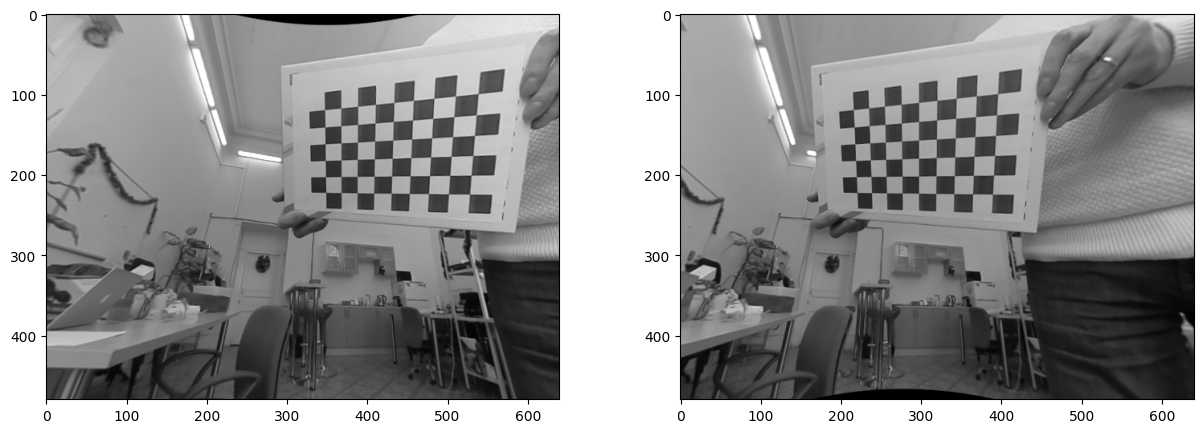

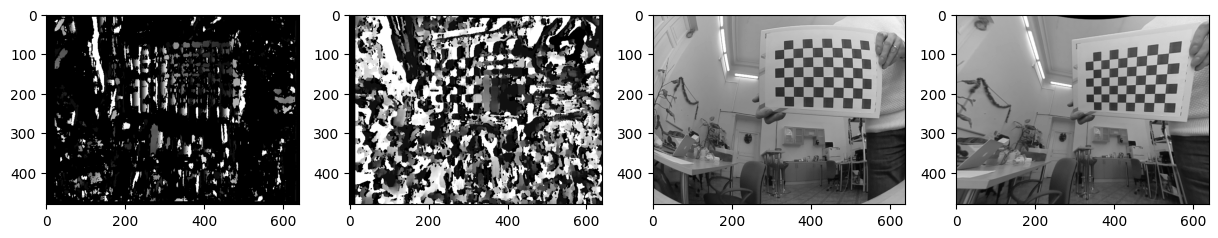

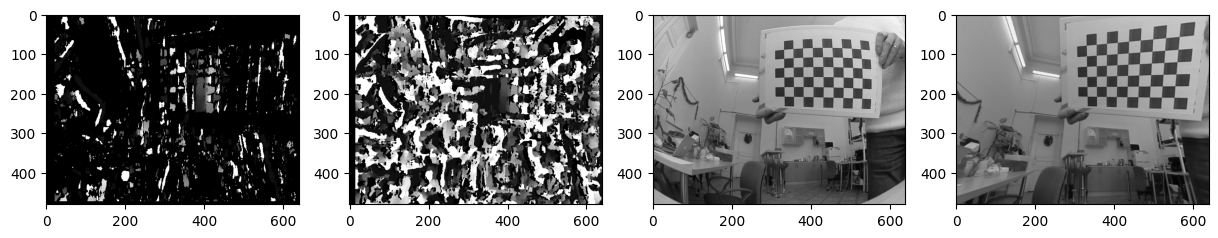

In [23]:
img_left = cv2.imread("./pairs/left_01.png" ,cv2.IMREAD_GRAYSCALE)
img_right = cv2.imread("./pairs/right_01.png" ,cv2.IMREAD_GRAYSCALE)
# print(img_left.shape, img_right.shape)

undistorted_image_left = cv2.remap(img_left, map1_left, map2_left, interpolation=cv2.INTER_LINEAR ,borderMode=cv2.BORDER_CONSTANT)
undistorted_image_right = cv2.remap(img_right, map1_right, map2_right, interpolation=cv2.INTER_LINEAR ,borderMode=cv2.BORDER_CONSTANT)

stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
stereo_sgm = cv2.StereoSGBM_create(numDisparities=16, blockSize=15)

disparity_left = stereo.compute(img_left, img_right)
disparity_sgm_left = stereo_sgm.compute(undistorted_image_left, undistorted_image_right)

disparity_right = stereo.compute(undistorted_image_right,undistorted_image_left)
disparity_sgm_right = stereo_sgm.compute(undistorted_image_right, undistorted_image_left)

plot(undistorted_image_left, undistorted_image_right)
plot(disparity_left, disparity_sgm_left, img_left, undistorted_image_left)
plot(disparity_right, disparity_sgm_right, img_left, undistorted_image)

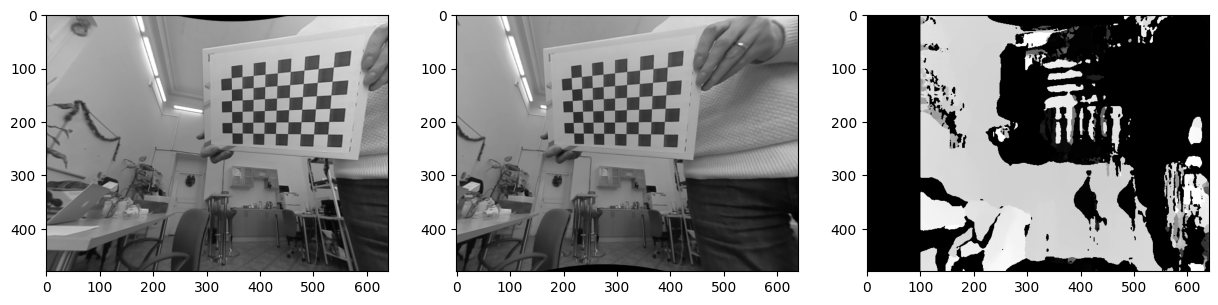

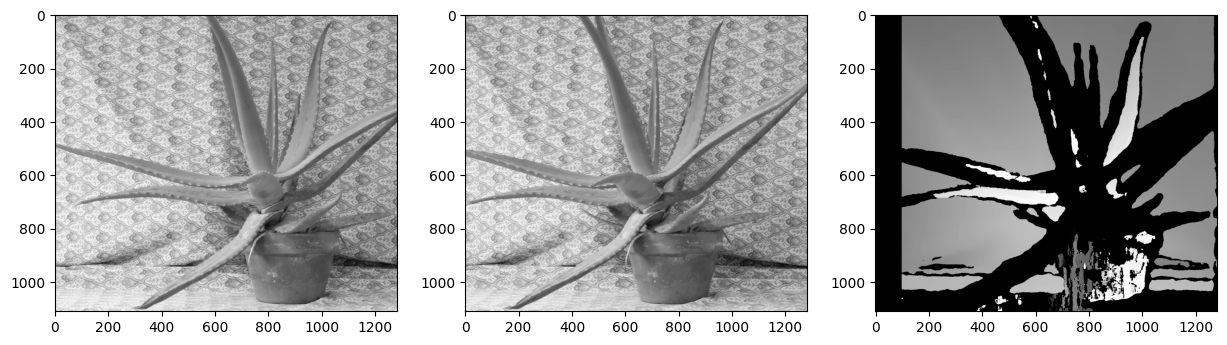

: 

In [44]:
img_left, img_right = cv2.imread("./aloes/aloeL.jpg", cv2.IMREAD_GRAYSCALE), cv2.imread("./aloes/aloeR.jpg", cv2.IMREAD_GRAYSCALE)

stereo_sgm = cv2.StereoSGBM_create(numDisparities=100, blockSize=32)

res_1 = stereo_sgm.compute(undistorted_image_left, undistorted_image_right)

res_2 = stereo_sgm.compute(img_left, img_right)

plot(undistorted_image_left, undistorted_image_right, res_1)

plot(img_left, img_right, res_2)